## Aeronet validation

### UCL
#### Feng Yin

We want to validate our ATM correction method with the [aronet](https://aeronet.gsfc.nasa.gov/) meansurement, which is ussally taken as the ground truth. There is a [list](https://aeronet.gsfc.nasa.gov/Site_Lists/site_index.html) showing all of the sites with specific level of measurments, and its available months as well. The thing we can do with this is to download data that S2 or L8 with less than 10% of the cloud cover and it has aeronet measurements as well.

In [1]:
import sys
sys.path.insert(0, 'python')
from sentinel_downloader import download_sentinel_amazon

In [7]:
import datetime
lat, lon = 37.5, -6.5
this_dates = download_sentinel_amazon(datetime.datetime(2017, 9, 1), "/home/ucfafyi/DATA/S2_MODIS/s_data/" , 
                                     latitude=lat, longitude=lon, 
                                     end_date=datetime.datetime(2017, 9, 13),
                                         clouds=10)

INFO:sentinel_downloader:Location coordinates: 29SQB
INFO:sentinel_downloader:Scanning archive...
INFO:sentinel_downloader:Will download data for 2017/09/04...
INFO:sentinel_downloader:Will download 1 acquisitions
INFO:sentinel_downloader:Creating output directory (/home/ucfafyi/DATA/S2_MODIS/s_data/29/S/QB/2017/9/4/0)
INFO:sentinel_downloader:Creating output directory (/home/ucfafyi/DATA/S2_MODIS/s_data/29/S/QB/2017/9/4/0/qi)
INFO:sentinel_downloader:Downloading a grand total of 85 files


In [1]:
!wget -nc https://aeronet.gsfc.nasa.gov/Site_Lists/aeronet_locations_2016_lev20.txt -P data;wget https://aeronet.gsfc.nasa.gov/Site_Lists/aeronet_locations_2017_lev20.txt -P data

File `data/aeronet_locations_2016_lev20.txt' already there; not retrieving.

--2017-09-05 00:23:16--  https://aeronet.gsfc.nasa.gov/Site_Lists/aeronet_locations_2017_lev20.txt
Resolving aeronet.gsfc.nasa.gov... 128.183.160.251
Connecting to aeronet.gsfc.nasa.gov|128.183.160.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6637 (6.5K) [text/plain]
Saving to: `data/aeronet_locations_2017_lev20.txt.6'

100%[======================================>] 6,637       --.-K/s   in 0s      

2017-09-05 00:23:17 (130 MB/s) - `data/aeronet_locations_2017_lev20.txt.6' saved [6637/6637]



In [2]:
!head data/aeronet_locations_2016_lev20.txt

AERONET_Database_Site_List,Num=0,Date_Generated=25:08:2017,Months_Available_for_Year,2016
Site_Name,Longitude(decimal_degrees),Latitude(decimal_degrees),Elevation(meters),JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Alta_Floresta,-56.104453,-9.871339,277.000000,1,1,1,1,1,1,1,0,0,0,0,0
Tucson,-110.953003,32.233002,779.000000,1,1,1,1,1,1,1,1,1,1,1,0
GSFC,-76.839833,38.992500,87.000000,1,1,1,1,1,1,1,1,1,1,1,1
Wallops,-75.474998,37.941666,10.000000,1,1,1,1,1,1,1,0,0,0,0,0
Key_Biscayne,-80.163330,25.731966,0.000000,1,1,1,1,1,1,1,1,1,1,1,1
Sevilleta,-106.885002,34.354721,1477.000000,1,1,1,1,1,1,0,0,0,0,0,0
Cart_Site,-97.486390,36.606670,318.000000,1,1,1,0,0,0,0,0,0,0,0,0
Bonanza_Creek,-148.316269,64.742805,150.000000,0,0,0,1,1,1,1,1,1,1,0,0


In [3]:
import numpy as np
sites = np.loadtxt('data/aeronet_locations_2016_lev20.txt', skiprows=1, dtype=str)
sites = np.array([i.split(',') for i in sites])

In [4]:
print sites[:,:4]# geolocation of sites

[['Site_Name' 'Longitude(decimal_degrees)' 'Latitude(decimal_degrees)'
  'Elevation(meters)']
 ['Alta_Floresta' '-56.104453' '-9.871339' '277.000000']
 ['Tucson' '-110.953003' '32.233002' '779.000000']
 ..., 
 ['Nouragues' '-52.680056' '4.087639' '300.000000']
 ['Vienna_BOKU' '16.331611' '48.237861' '266.000000']
 ['SDSU_IPLab' '-96.786075' '44.314828' '518.000000']]


In [5]:
sites[:,4:]# months availability

array([['JAN', 'FEB', 'MAR', ..., 'OCT', 'NOV', 'DEC'],
       ['1', '1', '1', ..., '0', '0', '0'],
       ['1', '1', '1', ..., '1', '1', '0'],
       ..., 
       ['0', '0', '0', ..., '0', '0', '0'],
       ['0', '0', '0', ..., '1', '1', '1'],
       ['0', '0', '0', ..., '1', '1', '0']],
      dtype='|S26')

In [6]:
for i in sites[1:]:
    names = i[0], 
    cord = i[1]+','+ i[2]
    months = []
    for _,j in enumerate(i[4:]):
        
        if int(j):
            months.append(_+1)
    break

In [7]:
i[4:]=='0'

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True], dtype=bool)

In [8]:
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
year = 2016
months = np.array(['%d%02d%02d'%(year, i, 1) for i in range(1,13)])
months[sites[1][4:]=='0']='no'

for i in ' '.join(months).split('no'):    
    if len(i)>7:
        start, end =  i.strip().split(' ')[0], i.strip().split(' ')[-1]#, i.split(' ')[-1]
        start, end = datetime.strptime(start, '%Y%m%d'), datetime.strptime(end, '%Y%m%d')+ relativedelta(months=1)-timedelta(days=1)  
        print start, end

2016-01-01 00:00:00 2016-07-31 00:00:00


We can get use the scihub api to get the availability of data over loccation over a period and with specific cloud cover, to match the dates with Aeronet measurements.

In [9]:
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
user_pass = np.loadtxt('scihub.api', dtype=str)
user, passw =  user_pass[0].split('=')[1], user_pass[1].split('=')[1]
api = SentinelAPI(user, passw, 'https://scihub.copernicus.eu/dhus')
def find_s2_tile(api, lat, lon, startdate, enddate):
    
    footprint =  '%f,%f'%(lat, lon)
    files = []
    beg = []
    try:

        products = api.query(footprint,
                             date = (startdate, enddate),
                             platformname = 'Sentinel-2',
                             cloudcoverpercentage = (0, 10))

        
        for k in range(len(products.values())):
            print 'beginposition: ', products.values()[k]['beginposition']
            print 'title: ',products.values()[k]['title']
            print 'uuid: ', products.values()[k]['uuid']
            uuid = products.values()[k]['uuid']
            api.download(uuid, directory_path='./data')
            print 'Finished %s'%products.values()[k]['title']
            filles.append(products.values()[k]['title'])
            beg.append(products.values()[k]['beginposition'])
    except:
        pass
    return beg, files

Download all of the Sentinel 2 files where there is aeronet measurements in that months and cloud cover is less than 10 %.

In [ ]:
import sys
sys.path.insert(0, 'python')
from sentinel_downloader import download_sentinel_amazon

year=2016
dic = {}
for k in range(len(sites))[1:]:
    site = sites[k][0]
    lon, lat = float(sites[k][1]), float(sites[k][2])
    print site,lat, lon
    months = np.array(['%d%02d%02d'%(year, i, 1) for i in range(1,13)])
    months[sites[k][4:]=='0']='no'
    file_list = []
    dates = []
    for i in ' '.join(months).split('no'):    
        if len(i)>7:
            start, end =  i.strip().split(' ')[0], i.strip().split(' ')[-1]#, i.split(' ')[-1]
            start, end = datetime.strptime(start, '%Y%m%d'), datetime.strptime(end, '%Y%m%d')+ relativedelta(months=1)-timedelta(days=1)  
            print start.date(), end.date()
            #file_list += find_s2_tile(api, lat, lon, start.date(), end.date())
            dates.append([start.date(), end.date()])
            this_dates = download_sentinel_amazon(start.date(), "/home/ucfafyi/DATA/S2_MODIS/s_data/" , 
                                     latitude=lat, longitude=lon, 
                                     end_date=end.date(),
                                         clouds=10)
            dates += this_dates
    dic[site] = [lat, lon, dates]

find the aeronet measurements and the corresponding Sentinel 2 measurements.

In [10]:
import mgrs
m = mgrs.MGRS()
roo = "/home/ucfafyi/DATA/S2_MODIS/s_data/"
s2_files = []
for _,i in enumerate(sites[1:]):
    site = i[0]
    lon, lat = float(i[1]), float(i[2])
    mg_coor = m.toMGRS(lat,lon, MGRSPrecision=4)
    try:
        dire = roo + str(int(mg_coor[:2]))+'/' + mg_coor[2] + '/' + mg_coor[3:5]
        #print _,site,lat, lon, dire
        for root, dirs, files in os.walk(dire):
            if root.split('/')[-1]=='qi':
                year, month, date = root.split('/')[-5:-2]
                #print int(year), int(month), int(date)
                s2_files.append([site,lat, lon, root[:-2]])
    except:
        print _,site,lat, lon, 'Unordinary MGRS coordinates, due to high latitude'
        pass
    break

0 Alta_Floresta -9.871339 -56.104453 Unordinary MGRS coordinates, due to high latitude


In [11]:
#np.savetxt('data/s2_files.txt', np.array(s2_files), fmt ='%s')

In [12]:
s2_files = np.loadtxt('data/s2_files.txt', dtype=str)

In [13]:
s2_files

array([['Alta_Floresta', '-9.871339', '-56.104453',
        '/home/ucfafyi/DATA/S2_MODIS/s_data/21/L/WK/2016/3/23/0/'],
       ['Alta_Floresta', '-9.871339', '-56.104453',
        '/home/ucfafyi/DATA/S2_MODIS/s_data/21/L/WK/2016/5/2/0/'],
       ['Alta_Floresta', '-9.871339', '-56.104453',
        '/home/ucfafyi/DATA/S2_MODIS/s_data/21/L/WK/2016/5/5/0/'],
       ..., 
       ['SDSU_IPLab', '44.314828', '-96.786075',
        '/home/ucfafyi/DATA/S2_MODIS/s_data/14/T/PQ/2016/10/5/0/'],
       ['SDSU_IPLab', '44.314828', '-96.786075',
        '/home/ucfafyi/DATA/S2_MODIS/s_data/14/T/PQ/2016/10/18/0/'],
       ['SDSU_IPLab', '44.314828', '-96.786075',
        '/home/ucfafyi/DATA/S2_MODIS/s_data/14/T/PQ/2016/11/4/0/']],
      dtype='|S56')

We can also download all of the aeronet points from [AEROENT website](https://aeronet.gsfc.nasa.gov/cgi-bin/combined_data_access_new). It is downloaded into my home directory in: `~/Downloads`

In [14]:
!head /home/ucfafyi/Downloads/AOT/LEV20/ALL_POINTS/*SDSU_IPLab*

Level 2.0. Quality Assured Data.<p>The following data are pre and post field calibrated, automatically cloud cleared and manually inspected.
Version 2 Direct Sun Algorithm
Location=SDSU_IPLab,long=-96.786,lat=44.315,elev=518,Nmeas=73,PI=Larry_Leigh,Email=Larry.Leigh@sdstate.edu
AOD Level 2.0,All Points,UNITS can be found at,,, http://aeronet.gsfc.nasa.gov/data_menu.html
Date(dd-mm-yy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm),%TripletVar_1640,%TripletVar_1020,%TripletVar_870,%TripletVar_675,%TripletVar_667,%TripletVar_555,%TripletVar_551,%TripletVar_532,%TripletVar_531,%TripletVar_500,%TripletVar_490,%TripletVar_443,%TripletVar_440,%TripletVar_412,%TripletVar_380,%TripletVar_340,%WaterError,440-870Angstrom,380-500Angstrom,440-675Angstrom,500-870Angstrom,340-440Angstrom,440-675Angstrom(Polar),Last_Processing_Date(dd/mm/yyyy),Solar_Zenith_Angle
24:05:2016,19:52:18,1

In [15]:
ls /home/ucfafyi/Downloads/AOT/LEV20/ALL_POINTS/*SDSU_IPLab*

/home/ucfafyi/Downloads/AOT/LEV20/ALL_POINTS/920801_170826_SDSU_IPLab.lev20


In [16]:
# a function for the readin of aeronet data, with the date as keys
import pandas as pd

def read_aeronet(filename):
    """Read a given AERONET AOT data file, and return it as a dataframe.
    
    This returns a DataFrame containing the AERONET data, with the index
    set to the timestamp of the AERONET observations. Rows or columns
    consisting entirely of missing data are removed. All other columns
    are left as-is.
    from http://blog.rtwilson.com/reading-aeronet-data-in-pandas-a-simple-helper-function/
    """
    dateparse = lambda x: pd.datetime.strptime(x, "%d:%m:%Y %H:%M:%S")
    aeronet = pd.read_csv(filename, skiprows=4, na_values=['N/A'],
                          parse_dates={'times':[0,1]},
                          date_parser=dateparse)

    aeronet = aeronet.set_index('times')
    del aeronet['Julian_Day']
    
    # Drop any rows that are all NaN and any cols that are all NaN
    # & then sort by the index
    an = (aeronet.dropna(axis=1, how='all')
                .dropna(axis=0, how='all')
                .rename(columns={'Last_Processing_Date(dd/mm/yyyy)': 'Last_Processing_Date'})
                .sort_index())

    return an

In [17]:
aero = read_aeronet('/home/ucfafyi/Downloads/AOT/LEV20/ALL_POINTS/920801_170826_SDSU_IPLab.lev20')

In [18]:
aero_date = aero['2016-05-25'].loc[:,'AOT_1640':'AOT_340']
err = aero['2016-05-25'].loc[:,'%TripletVar_1640':'%TripletVar_340']

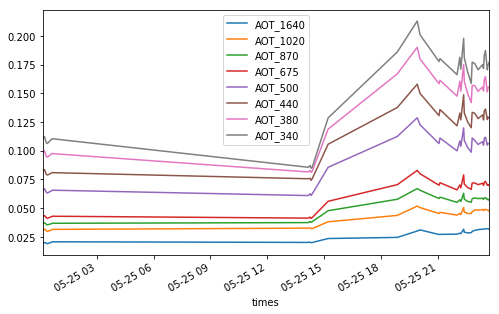

In [19]:
%matplotlib inline
aero_date.plot(kind = 'line',figsize=(8,5), yerr=err)

(736109.0, array([ 736109.99998843]))

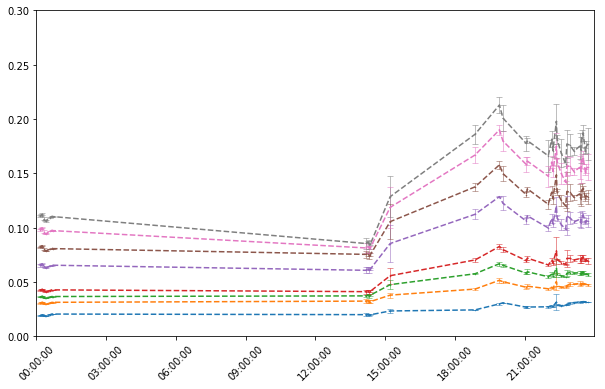

In [22]:
import pylab as plt
%matplotlib inline
date = '2016-05-25 '
plt.figure(figsize=(10,6))
for i,_ in enumerate(aero_date.keys()):
    plt.errorbar(aero_date.index, aero_date[aero_date.keys()[i]],ls='--',marker='o', ms=1,
                 yerr= 0.01*err[err.keys()[i]],capsize=3, elinewidth=0.5,
                 markeredgewidth=0.5)
    tickes = pd.DatetimeIndex([date+'%02d:00:00'%i for i in np.arange(0,24.,3)])
    ticks = ['%02d:00:00'%i for i in np.arange(0,24., 3)]
plt.xticks(tickes, ticks, rotation=45)
plt.ylim(0,0.3)
plt.xlim(tickes[0], pd.DatetimeIndex(['2016-05-25 '+'23:59:59']))

In [23]:
from scipy.interpolate import interp1d

[Time format:](https://aeronet.gsfc.nasa.gov/new_web/data_description_AOD_V2.html)
1. All times are provided as Greenwich Mean Time (GMT) for the solar day.
2. All averages are calculated using the GMT solar day.
3. The GMT solar day may overlap two calendar days for some AERONET sites.
4. "Day" is defined as the GMT solar day.


In [24]:
# all of the time are Greenwich Mean Time (GMT) for the solar day
hours = np.array([i.hour+ i.minute/60. + i.second/3600. for i in aero_date.index])

In [25]:
f_aot = interp1d(hours, aero_date.T, bounds_error=0)
f_err = interp1d(hours, err.T, bounds_error=0)

0

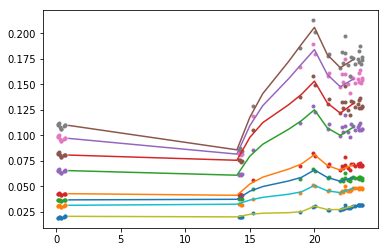

In [26]:
import pylab as plt
xnew = np.arange(0, 24.1, 1)
ynew = f_aot(xnew)   # use interpolation function returned by `interp1d`
plt.plot(hours, aero_date, 'o', xnew, ynew.T, '-', ms=3)
0

0.125736747887 0.118181383049


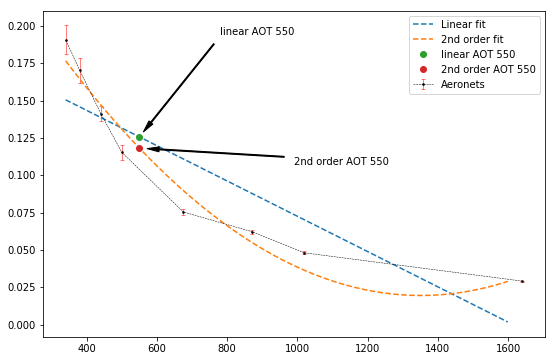

In [27]:
# we interpolate the data over a day and get the GMT time
# aerosol measurements over 1640, 1020,  870,  675,  500,  440,  380,  340
# then interpolate through them to get the aot 550
wv = np.array([int(i.split('_')[-1]) for i in aero_date.keys()])
xnew = 20.5
ynew = f_aot(xnew)
p1 = np.poly1d(np.polyfit(wv, ynew, 1))
p2 = np.poly1d(np.polyfit(wv, ynew, 2))
inter1 = p1(np.arange(340, 1600, 1))
inter2 = p2(np.arange(340, 1600, 1))
enew = f_err(xnew)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.errorbar(wv, ynew,enew*0.01, label='Aeronets', ls='--',marker='o', ms=2,
                capsize=2, elinewidth=0.5,ecolor='r',c='k',lw=0.5,
                 markeredgewidth=0.5)
ax.plot(np.arange(340, 1600, 1), inter1, '--', label='Linear fit')
ax.plot(np.arange(340, 1600, 1), inter2, '--', label='2nd order fit')
ax.plot(550, p1(550), 'o', label='linear AOT 550')
ax.plot(550, p2(550), 'o', label='2nd order AOT 550')
ax.annotate('linear AOT 550', xy=(550, p1(550)),  xycoords='data',
            xytext=(0.5, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05, width=1,headwidth=5),
            horizontalalignment='right', verticalalignment='top',
            )
ax.annotate('2nd order AOT 550', xy=(550, p2(550)),  xycoords='data',
            xytext=(0.5, 0.55), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            horizontalalignment='left', verticalalignment='top',
            )
plt.legend()
print p1(550), p2(550)

In [34]:
from glob import glob
import pandas as pd
from scipy.interpolate import interp1d
import pylab as plt
from scipy.stats import linregress
import numpy as np

def read_aeronet(filename):
    """Read a given AERONET AOT data file, and return it as a dataframe.
    
    This returns a DataFrame containing the AERONET data, with the index
    set to the timestamp of the AERONET observations. Rows or columns
    consisting entirely of missing data are removed. All other columns
    are left as-is.
    from http://blog.rtwilson.com/reading-aeronet-data-in-pandas-a-simple-helper-function/
    """
    dateparse = lambda x: pd.datetime.strptime(x, "%d:%m:%Y %H:%M:%S")
    aeronet = pd.read_csv(filename, skiprows=4, na_values=['N/A'],
                          parse_dates={'times':[0,1]},
                          date_parser=dateparse)

    aeronet = aeronet.set_index('times')
    del aeronet['Julian_Day']
    
    # Drop any rows that are all NaN and any cols that are all NaN
    # & then sort by the index
    an = (aeronet.dropna(axis=1, how='all')
                .dropna(axis=0, how='all')
                .rename(columns={'Last_Processing_Date(dd/mm/yyyy)': 'Last_Processing_Date'})
                .sort_index())

    return an

def inter_aot(wv, aot, full=False, Second=True):
    '''
    A function for the interpolation of Aeronet measurements 
    to AOT 550.
    args:
    wv -- wavelength 
    aot -- corresponding aot value for each wavelength
    full -- full out put or not
    Second -- second order fitting
    return:
    if full = True
    aot_550, ang, off, cov, error, correlation are returned
    if full = False
    only aot_550 and the Angustrom and offset are returned
    '''
    m = (wv>=400) & (wv<=870)
    if Second:
        a1,a2,a3 = np.polyfit(np.log(wv[m]), -1*np.log(aot[m]), 2)
        p = np.poly1d(np.polyfit(np.log(wv[m]), -1*np.log(aot[m]), 2))
        error = [sum(((p(np.log(wv[m]))-(-1*np.log(aot[m])))**2)),]
        aot_550 = np.exp(-1*p(np.log(550)))
    else:   
        ang, off, r_value, p_value, std_err = linregress(np.log(wv[m]), -1*np.log(aot[m]))
        p = np.poly1d([ang, off])
        error = [std_err, r_value, p_value ]                
        aot_550 = np.exp(-1*(ang*np.log(550)+off))
    if full:
        return aot_550, p, error
    else:
        return aot_550, p

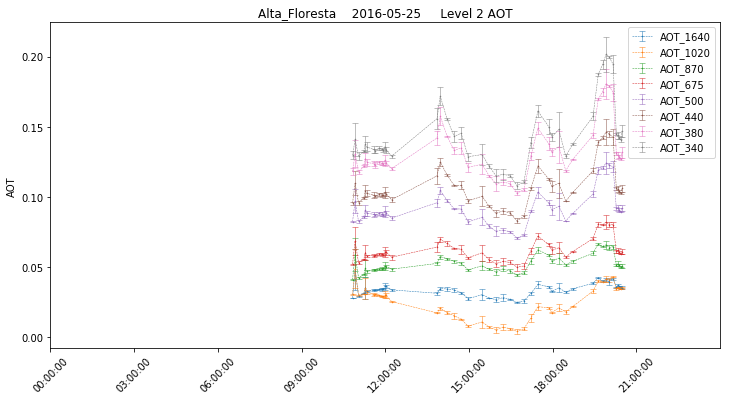

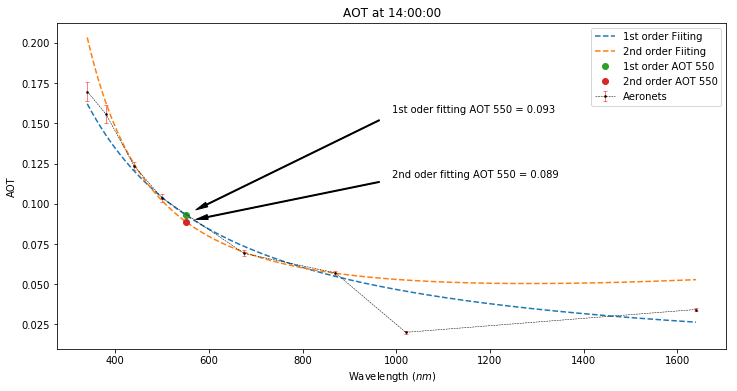

In [36]:
from glob import glob
time = 14
plot_all, plot_ang, plot_date=1,1,1
root = '/home/ucfafyi/Downloads/AOT/LEV20/ALL_POINTS/'
fname = glob(root+'*%s*'%site)[0]
aero = read_aeronet(fname)
aero_date = aero[date].loc[:,'AOT_1640':'AOT_340']
err = aero[date].loc[:,'%TripletVar_1640':'%TripletVar_340']
#Angstrom_440_870 = aero[date].loc[:,'440-870Angstrom']
hours = np.array([i.hour+ i.minute/60. + i.second/3600. for i in aero_date.index])
f_aot = interp1d(hours, aero_date.T, bounds_error=0)
f_err = interp1d(hours, err.T, bounds_error=0)
#f_ang = interp1d(hours, Angstrom_440_870.T, bounds_error=0)
wv = np.array([int(i.split('_')[-1]) for i in aero_date.keys()])
ynew = f_aot(time)
enew = f_err(time)
aot_550_1, p1, error_1 = inter_aot(wv, ynew, full=1, Second=0)
aot_550_2, p2, error_2 = inter_aot(wv, ynew, full=1, Second=1)
if plot_all | plot_date:
    plt.figure(figsize=(12,6))
    for i,_ in enumerate(aero_date.keys()):
        plt.errorbar(aero_date.index, aero_date[aero_date.keys()[i]],ls='--',marker='o', ms=1,
                     yerr= 0.01*err[err.keys()[i]],capsize=3, elinewidth=0.5,lw=0.5,
                     markeredgewidth=0.5, label=aero_date.keys()[i])
    tickes = pd.DatetimeIndex([date+' %02d:00:00'%i for i in np.arange(0,24.,3)])
    ticks = ['%02d:00:00'%i for i in np.arange(0,24., 3)]
    plt.xticks(tickes, ticks, rotation=45)
    plt.xlim(tickes[0], pd.DatetimeIndex([date+' 23:59:59']))
    plt.legend()
    plt.title('%s    %s    Level 2 AOT'%(site, date))
    plt.ylabel('AOT')

if plot_all | plot_ang:
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    ax.errorbar(wv, ynew,enew*0.01, label='Aeronets', ls='--',marker='o', ms=2,
                    capsize=2, elinewidth=0.5,ecolor='r',c='k',lw=0.5,
                     markeredgewidth=0.5)
    ang_aot_1 = np.exp(-1*p1(np.log(np.arange(wv.min(), wv.max()+1, 1))))
    ang_aot_2 = np.exp(-1*p2(np.log(np.arange(wv.min(), wv.max()+1, 1))))
    ax.plot(np.arange(wv.min(), wv.max()+1, 1), ang_aot_1, '--', label='1st order Fiiting')
    ax.plot(np.arange(wv.min(), wv.max()+1, 1), ang_aot_2, '--', label='2nd order Fiiting')
    ax.plot(550, aot_550_1 , 'o', label='1st order AOT 550')
    ax.plot(550, aot_550_2 , 'o', label='2nd order AOT 550')
    ax.annotate('1st oder fitting AOT 550 = %.03f'%aot_550_1, xy=(550, aot_550_1),  xycoords='data',
                xytext=(0.5, 0.75), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                horizontalalignment='left', verticalalignment='top',
                )
    ax.annotate('2nd oder fitting AOT 550 = %.03f'%aot_550_2, xy=(550, aot_550_2),  xycoords='data',
                xytext=(0.5, 0.55), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                horizontalalignment='left', verticalalignment='top',
                )
    plt.legend()
    plt.ylabel('AOT')
    plt.xlabel('Wavelength ($nm$)')
    plt.title('AOT at %02d:%02d:%02d'%(int(time), (time-int(time))*60, ((time - int(time))*60.-int((time-int(time))*60))*60))


In [ ]:
def Aeronet_measures(site, date, time,  plot_all=0, plot_date=0, plot_ang=0, root = None):
    '''
    A function for the retrieval of aeronet measurements
    at specific date and time from an Aeroent site
    linear interpolation used for the interpolation
    over time of the aot and corresponding Triple values
    A fitting to Angstrom is used for the AOT 550 instead 
    of 1st or 2nd order polynominal fitting
    
    args:
    site -- Aeronet site names
    date -- date in the format of 'yyyy-mm-dd'
    time -- float vlaue of time in a day, like '23.56'
    plot_all -- plot both the Aeronet measurements of the day and Angstrom fitting 
    root -- directory to the aeronet measurements files downloaded from 
    'https://aeronet.gsfc.nasa.gov/new_web/index.html'
    
    return:
    aero_date -- aeronet measurements of the day
    err -- Triple error
    aot_550 -- aot_550 at the time
    (ang, off) -- Angstrom and fitting off set
    
    '''
    fname = glob(root+'*%s*'%site)[0]
    aero = read_aeronet(fname)
    aero_date = aero[date].loc[:,'AOT_1640':'AOT_340']
    err = aero[date].loc[:,'%TripletVar_1640':'%TripletVar_340']
    #Angstrom_440_870 = aero[date].loc[:,'440-870Angstrom']
    hours = np.array([i.hour+ i.minute/60. + i.second/3600. for i in aero_date.index])
    f_aot = interp1d(hours, aero_date.T, bounds_error=0)
    f_err = interp1d(hours, err.T, bounds_error=0)
    #f_ang = interp1d(hours, Angstrom_440_870.T, bounds_error=0)
    wv = np.array([int(i.split('_')[-1]) for i in aero_date.keys()])
    ynew = f_aot(time)
    enew = f_err(time)
    aot_550_1, p1, error_1 = inter_aot(wv, ynew, full=1, Second=0)
    aot_550_2, p2, error_2 = inter_aot(wv, ynew, full=1, Second=1)
    if plot_all | plot_date:
        plt.figure(figsize=(12,6))
        for i,_ in enumerate(aero_date.keys()):
            plt.errorbar(aero_date.index, aero_date[aero_date.keys()[i]],ls='--',marker='o', ms=1,
                         yerr= 0.01*err[err.keys()[i]],capsize=3, elinewidth=0.5,lw=0.5,
                         markeredgewidth=0.5, label=aero_date.keys()[i])
        tickes = pd.DatetimeIndex([date+' %02d:00:00'%i for i in np.arange(0,24.,3)])
        ticks = ['%02d:00:00'%i for i in np.arange(0,24., 3)]
        plt.xticks(tickes, ticks, rotation=45)
        plt.xlim(tickes[0], pd.DatetimeIndex([date+' 23:59:59']))
        plt.legend()
        plt.title('%s    %s    Level 2 AOT'%(site, date))
        plt.ylabel('AOT')
        
    if plot_all | plot_ang:
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_subplot(111)
        ax.errorbar(wv, ynew,enew*0.01, label='Aeronets', ls='--',marker='o', ms=2,
                        capsize=2, elinewidth=0.5,ecolor='r',c='k',lw=0.5,
                         markeredgewidth=0.5)
        ang_aot_1 = np.exp(-1*p1(np.log(np.arange(wv.min(), wv.max()+1, 1))))
        ang_aot_2 = np.exp(-1*p2(np.log(np.arange(wv.min(), wv.max()+1, 1))))
        ax.plot(np.arange(wv.min(), wv.max()+1, 1), ang_aot_1, '--', label='1st order Fiiting')
        ax.plot(np.arange(wv.min(), wv.max()+1, 1), ang_aot_2, '--', label='2nd order Fiiting')
        ax.plot(550, aot_550_1 , 'o', label='1st order AOT 550')
        ax.plot(550, aot_550_2 , 'o', label='2nd order AOT 550')
        ax.annotate('1st oder fitting AOT 550 = %.03f'%aot_550_1, xy=(550, aot_550_1),  xycoords='data',
                    xytext=(0.5, 0.75), textcoords='axes fraction',
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                    horizontalalignment='left', verticalalignment='top',
                    )
        ax.annotate('2nd oder fitting AOT 550 = %.03f'%aot_550_2, xy=(550, aot_550_2),  xycoords='data',
                    xytext=(0.5, 0.55), textcoords='axes fraction',
                    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                    horizontalalignment='left', verticalalignment='top',
                    )
        plt.legend()
        plt.ylabel('AOT')
        plt.xlabel('Wavelength ($nm$)')
        plt.title('AOT at %02d:%02d:%02d'%(int(time), (time-int(time))*60, ((time - int(time))*60.-int((time-int(time))*60))*60))
    return [aot_550_2, p2, error_2], [aot_550_1, p1, error_1]